## 03 EDA

Here I explore the data already cleaned an selected for the model. 

In [1]:
# 📚 Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
#pandas.set_option('display.max_rows', df.shape[0]+1) # display all rows 
warnings.filterwarnings('ignore') # ignore warnings
pd.set_option('display.max_rows', None)

In [2]:
#Import data
data_df=pd.read_csv(r'C:\Users\luisj\Desktop\Ironhack\Archivos Ejercicios\09_Final project\Data\cities_clean_model.csv')

In [3]:
data_df.sample(10)

,Unnamed: 0,"Population on the 1st of January, total",Prop. of working age population qualified at level 5 or 6 ISCED,Share of students in higher education in the total population (per 1000 persons),Women per 100 men,Median population age,Average size of households,Unemployment rate,Proportion of households that are 1-person households,Number of registered cars per 1000 population,People killed in road accidents per 10000 pop.,Nationals as a proportion of population,Crude birth rate (per 1000 inhabitants),cities_name
461,IT036C,94783.0,31.0,208.0,110.4,47.0,2.0,8.0,34.0,705.87,0.53,92.0,6.0,Lecce
447,IT022C,64850.0,29.0,79.0,108.1,48.0,2.0,10.0,24.0,772.00,0.46,98.0,6.0,Potenza
571,NL047C,129840.0,54.0,53.0,103.1,37.0,2.0,4.0,41.0,394.70,0.08,97.0,11.0,Zwolle
187,DE120C,101055.0,30.0,118.0,109.2,45.1,2.0,6.0,51.0,440.30,0.00,91.0,9.0,Hildesheim
249,ES039C,84202.0,28.0,33.0,97.9,37.6,3.0,23.0,25.0,479.11,0.24,93.0,10.0,Ceuta
59,CZ010C,91727.0,26.0,79.0,102.6,41.7,2.0,7.0,36.0,462.30,1.11,95.0,11.0,Pardubice
793,UK076C,224658.0,29.0,35.0,103.6,40.2,2.0,5.0,33.0,414.43,0.13,92.0,12.0,Tameside
200,EE002C,95430.0,48.0,174.0,121.5,39.0,2.0,4.0,44.0,379.49,0.31,91.0,11.0,Tartu
609,PL034C,73398.0,34.0,16.0,109.2,41.5,3.0,6.0,24.0,867.88,0.54,100.0,9.0,Piła
707,SE014C,111026.0,31.0,43.0,100.9,39.0,2.0,7.0,38.0,396.27,0.18,91.0,12.0,Borås


In [4]:
#Join data with dictionary
dictionary_df=pd.read_csv('D:\Ironhack\datos_proyecto\clean_data\dictionary.csv') 
dictionary_df=dictionary_df[dictionary_df['label'].notna()]
# Create a dictionary from the DataFrame
dictionary_2 = dictionary_df.set_index('Column Name')['label'].to_dict()
datanames_df = data_df.rename(columns=dictionary_2)
datanames_df = datanames_df.rename(columns={'DE1003I':'Women per 100 men','DE1073V':'Median population age'})

In [5]:
dictionary_df

,Column Name,Dataframe,Measurement unit,label
2,TE1001I,education,NaN,Number of Children 0-4 in day care (publ.&priv...
3,TE1001V,education,Absolute Number (monthly average of the year),Number of children 0-4 in day care or school
4,TE1026I,education,NaN,Share of students in higher education in the t...
5,TE1026V,education,Absolute Number,Students in higher education (ISCED level 5-8)...
6,TE1027V,education,Absolute Number,Students in higher education (ISCED level 5-8)...
7,TE1028V,education,Absolute Number,Students in higher education (ISCED level 5-8)...
8,TE1039V,education,NaN,Share of early leavers from education and trai...
9,TE1040V,education,NaN,Share of early leavers from education and trai...
10,TE1041V,education,NaN,Share of early leavers from education and trai...
11,TE2025V,education,Absolute Number,"Persons aged 25-64 with ISCED level 0, 1 or 2 ..."


In [6]:
nulls = pd.DataFrame(datanames_df.isna().sum()*100/len(datanames_df), columns=['percentage'])
nulls.sort_values('percentage', ascending = False)

,percentage
Unnamed: 0,0.0
"Population on the 1st of January, total",0.0
Prop. of working age population qualified at level 5 or 6 ISCED,0.0
Share of students in higher education in the total population (per 1000 persons),0.0
Women per 100 men,0.0
Median population age,0.0
Average size of households,0.0
Unemployment rate,0.0
Proportion of households that are 1-person households,0.0
Number of registered cars per 1000 population,0.0


In [7]:
data_df=datanames_df

In [8]:
numeric_df = data_df.select_dtypes(include=[float, int])
categorical_df = data_df.select_dtypes(include=[object, 'category'])
date_df = data_df.select_dtypes(include=[pd.Timestamp, 'datetime'])

In [9]:
numeric_df.shape

(853, 12)

In [10]:
categorical_df.shape

(853, 2)

In [11]:
categorical_df.head(5)

,Unnamed: 0,cities_name
0,AT001C,Wien
1,AT002C,Graz
2,AT003C,Linz
3,AT004C,Salzburg
4,AT005C,Innsbruck


In [12]:
date_df.shape

(853, 2)

In [13]:
date_df.head(5)

,Unnamed: 0,cities_name
0,AT001C,Wien
1,AT002C,Graz
2,AT003C,Linz
3,AT004C,Salzburg
4,AT005C,Innsbruck


Plot the density function

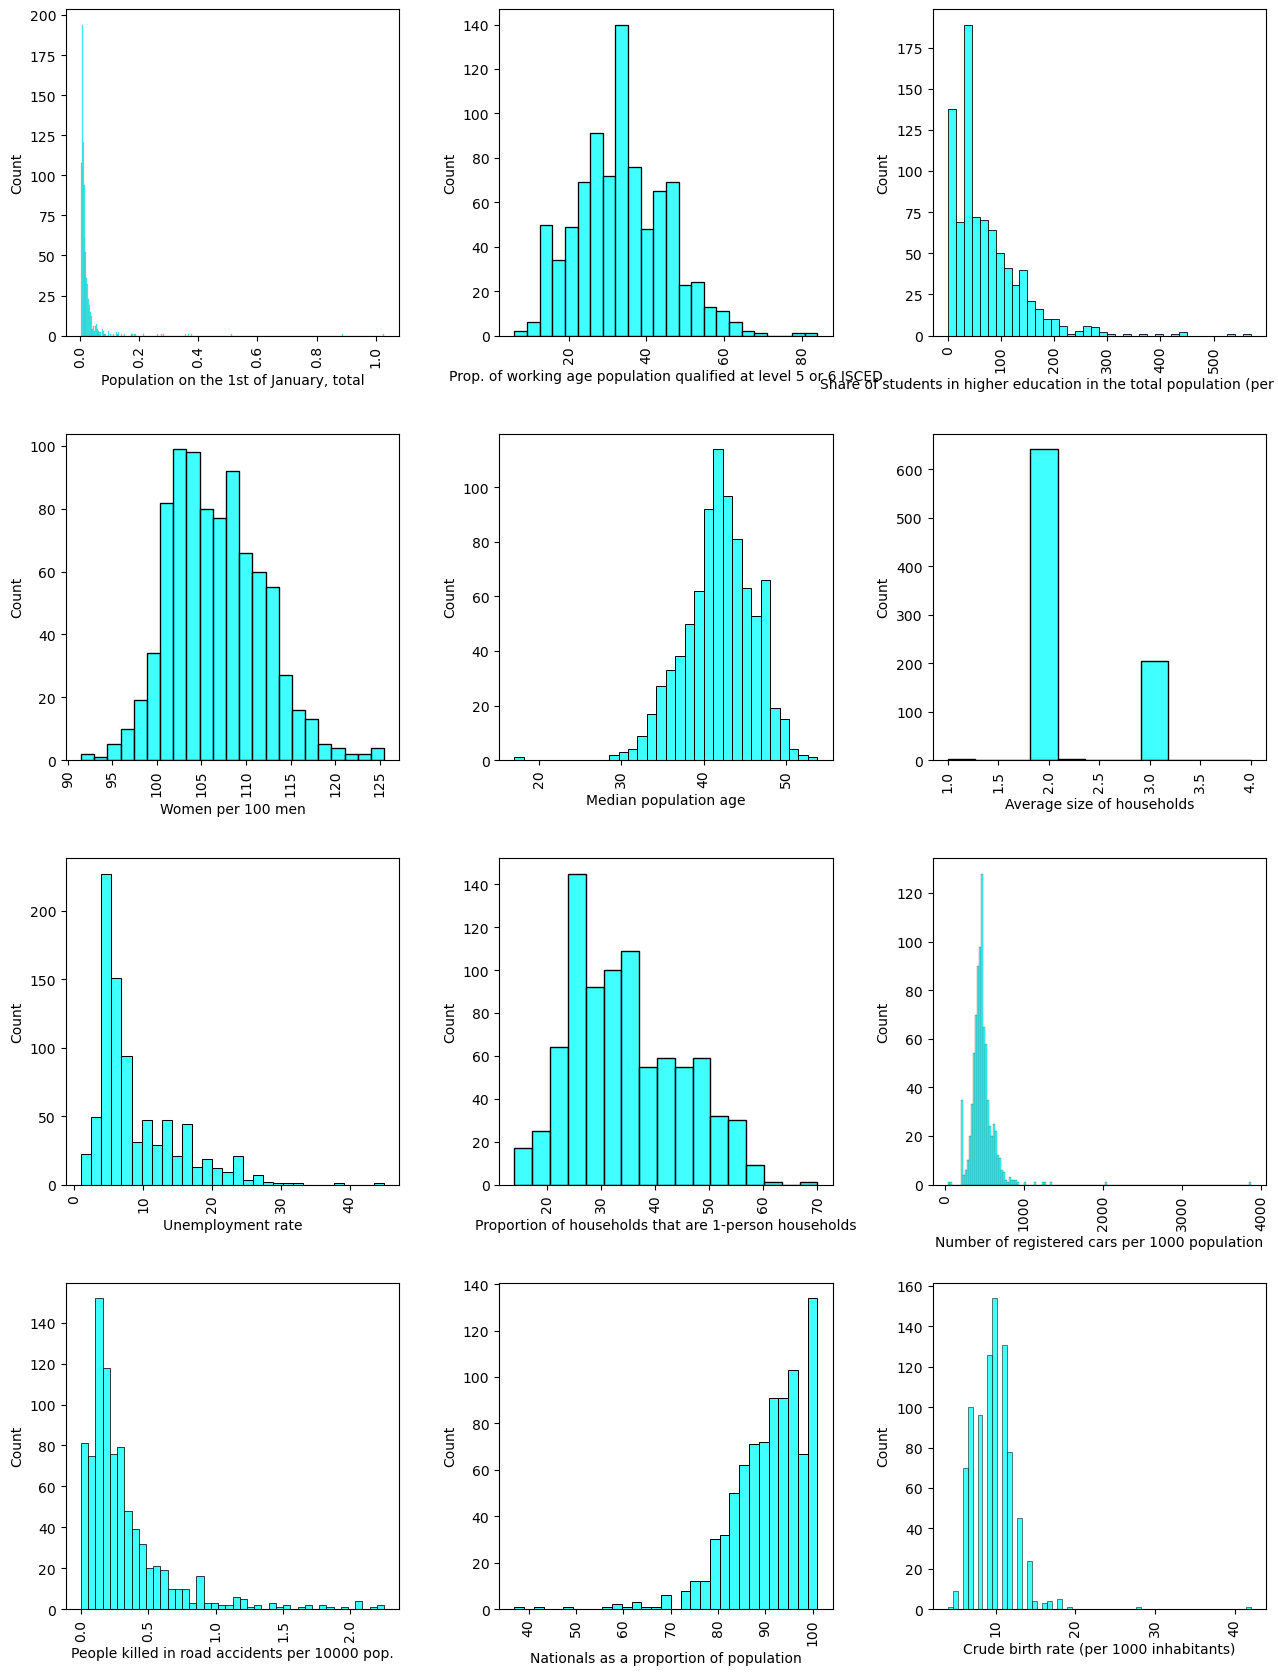

In [14]:
# determine the number of rows and columns in the plot grid
num_cols = 3  # number of columns in the grid
num_rows = (len(numeric_df.columns) + num_cols - 1) // num_cols  # number of rows in the grid

# create the plot grid and plot each distribution in a separate subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
plt.xticks(rotation=90)
for i, column in enumerate(numeric_df.columns):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx]
    sns.histplot(x=numeric_df[column], ax=axes[row_idx, col_idx], color='cyan')
    axes[row_idx, col_idx].set_xlabel(column)
    axes[row_idx, col_idx].set_xticklabels(axes[row_idx, col_idx].get_xticklabels(), rotation=90)

# adjust the spacing between subplots and show the figure
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.3, hspace=0.3)
plt.show()

#there is skewness in some variables

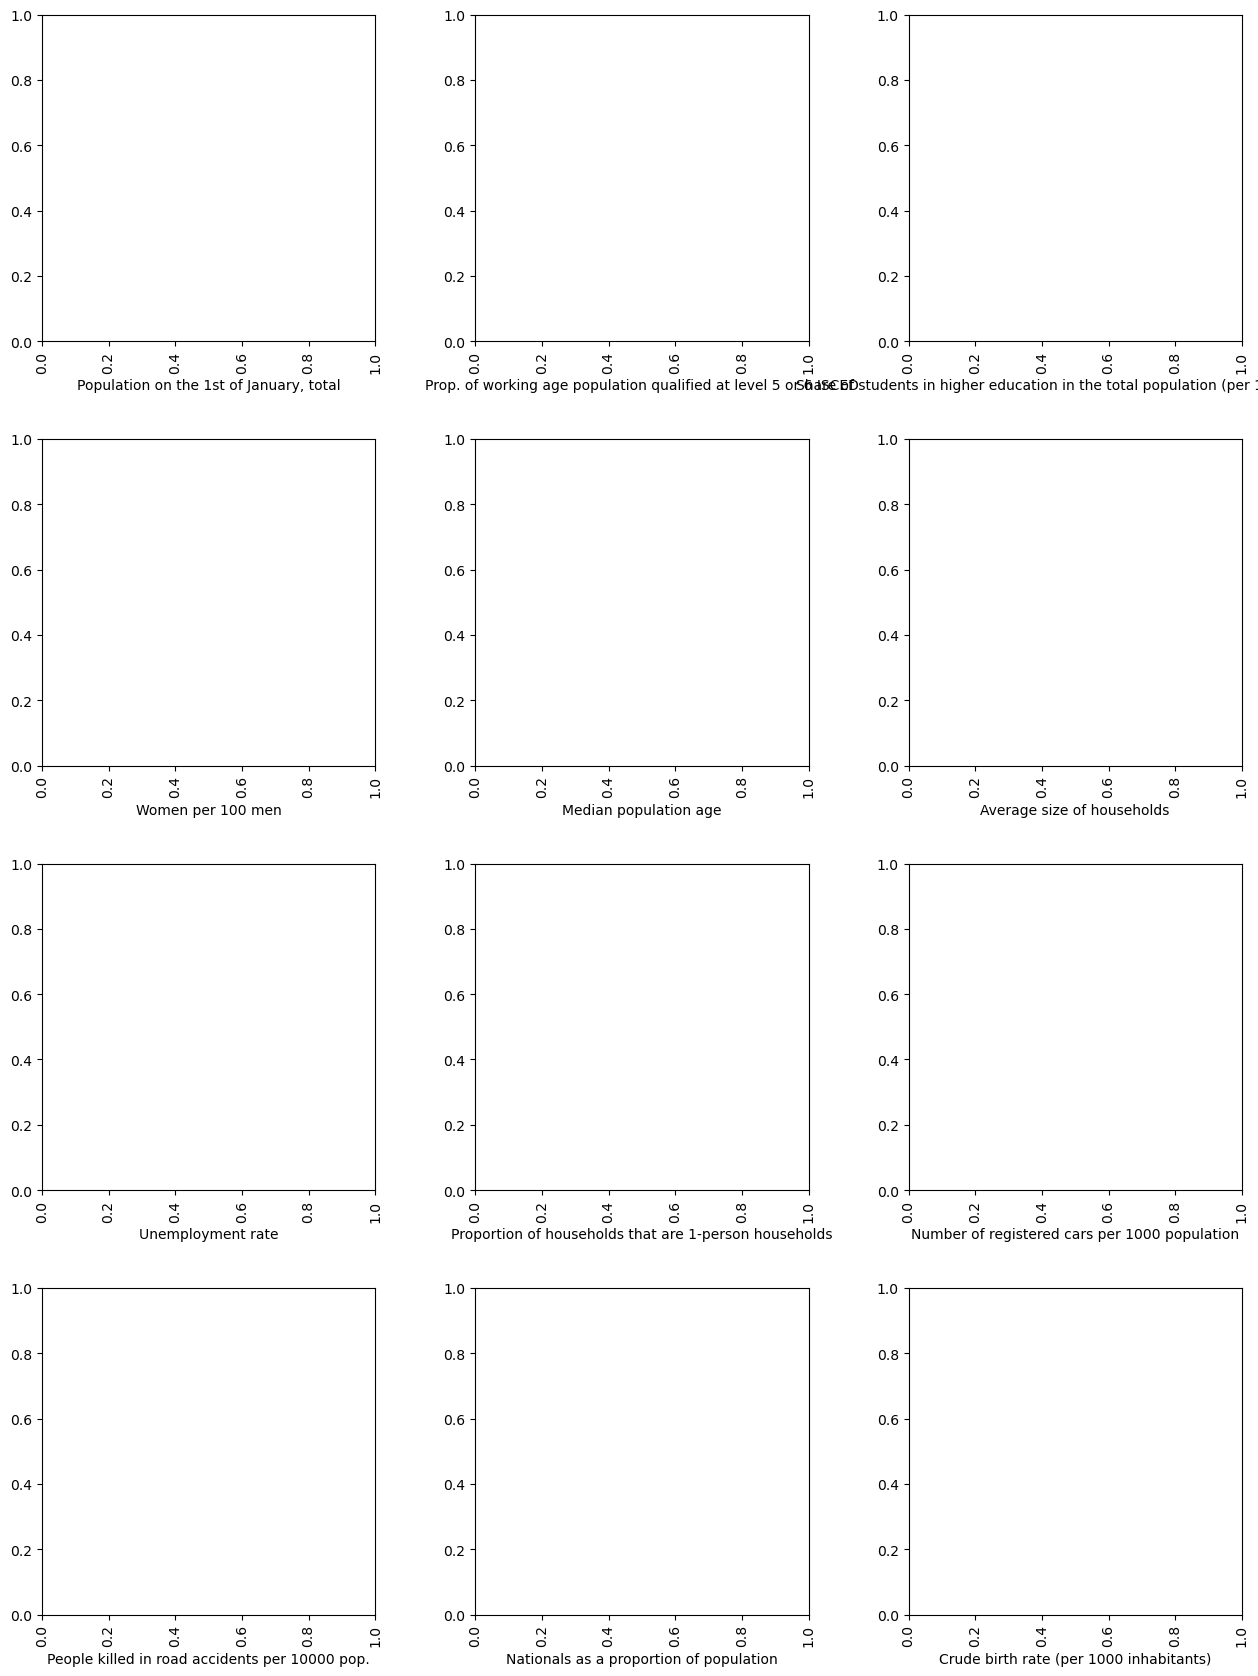

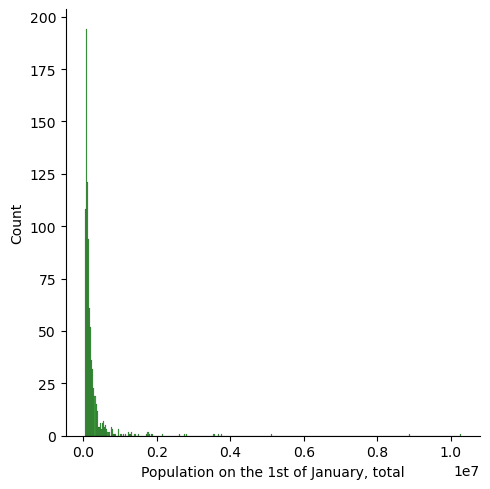

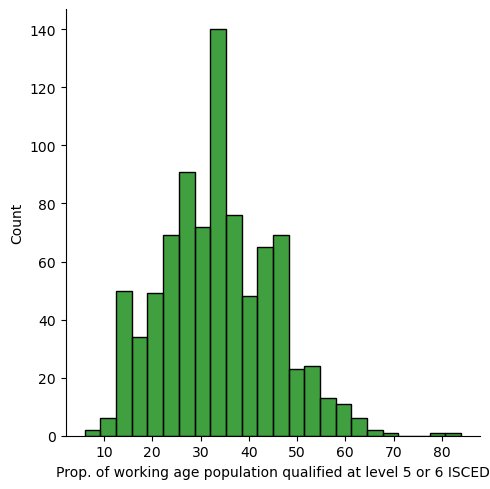

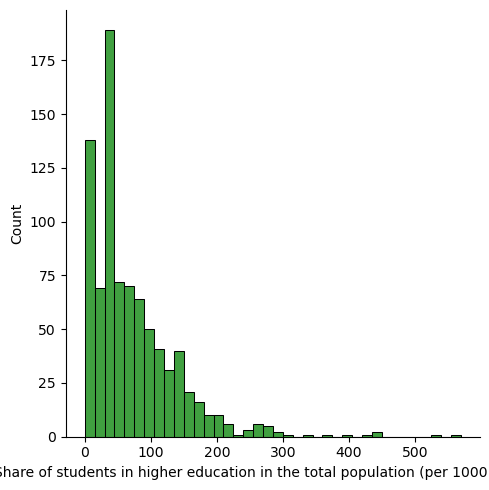

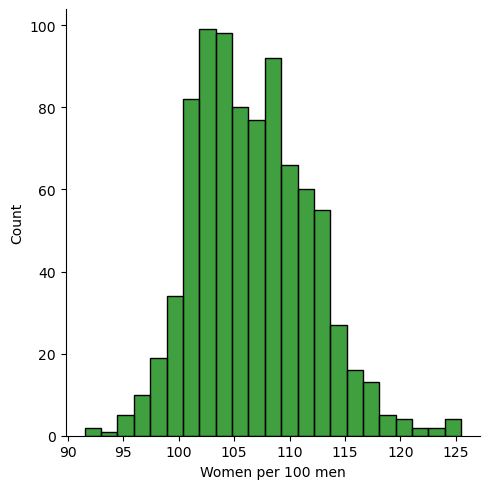

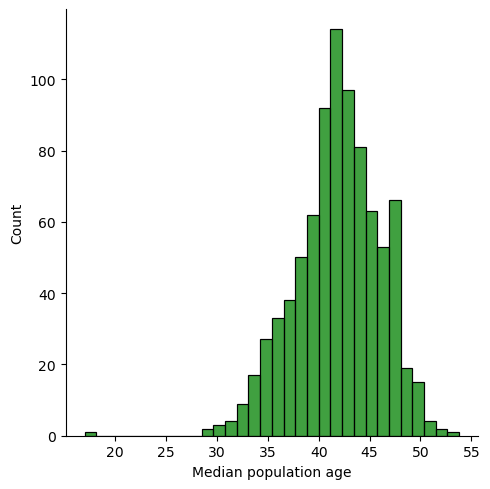

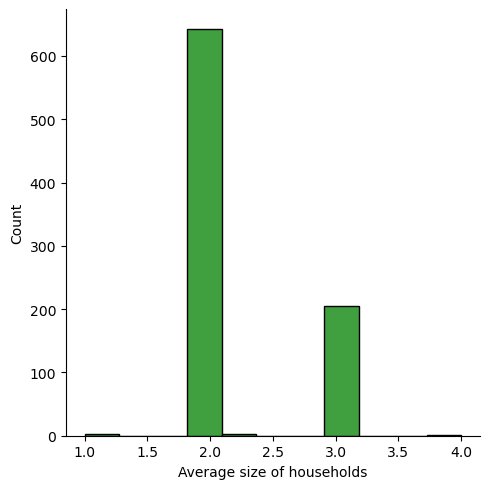

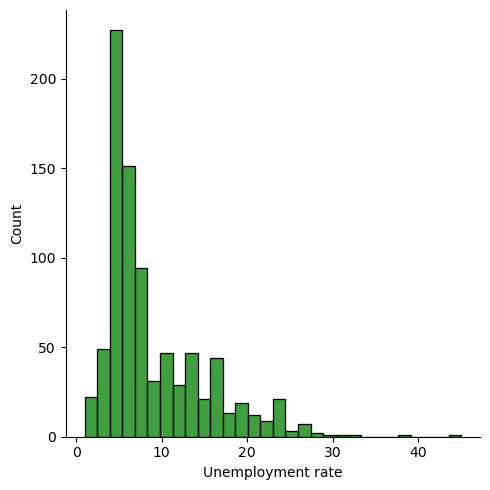

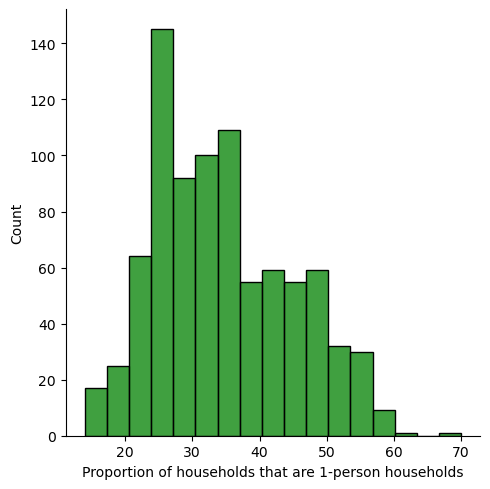

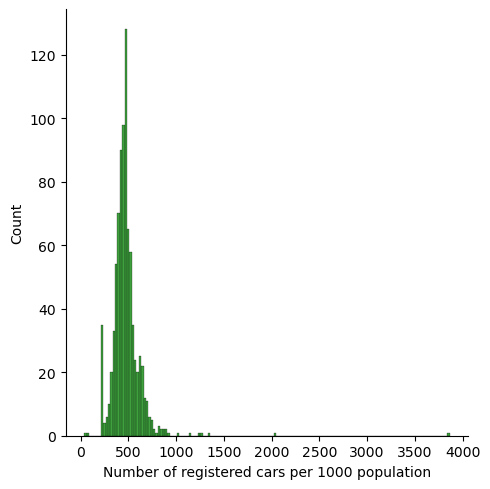

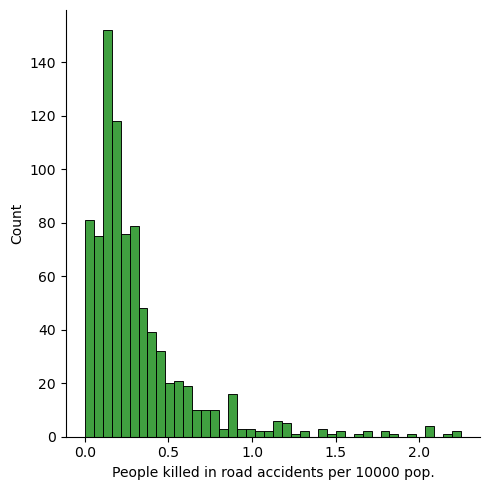

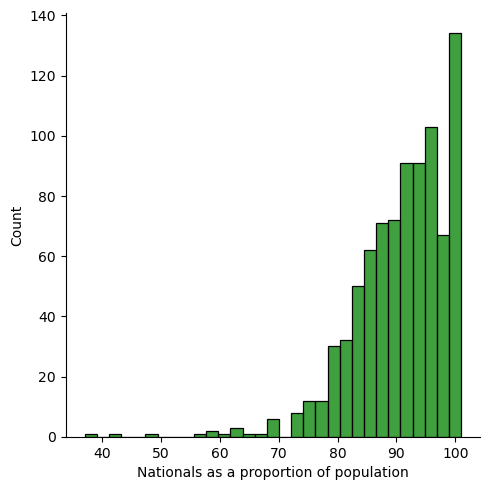

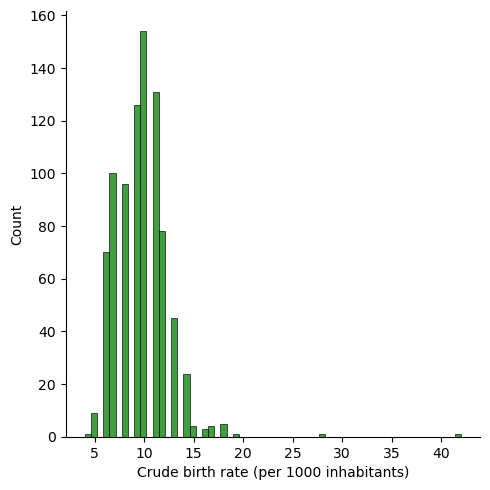

In [15]:
# determine the number of rows and columns in the plot grid
num_cols = 3  # number of columns in the grid
num_rows = (len(numeric_df.columns) + num_cols - 1) // num_cols  # number of rows in the grid

# create the plot grid and plot each distribution in a separate subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
plt.xticks(rotation=90)
for i, column in enumerate(numeric_df.columns):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx]
    sns.displot(numeric_df[column], ax=ax, color='green')
    axes[row_idx, col_idx].set_xlabel(column)
    axes[row_idx, col_idx].set_xticklabels(axes[row_idx, col_idx].get_xticklabels(), rotation=90)

# adjust the spacing between subplots and show the figure
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.3, hspace=0.3)
plt.show()

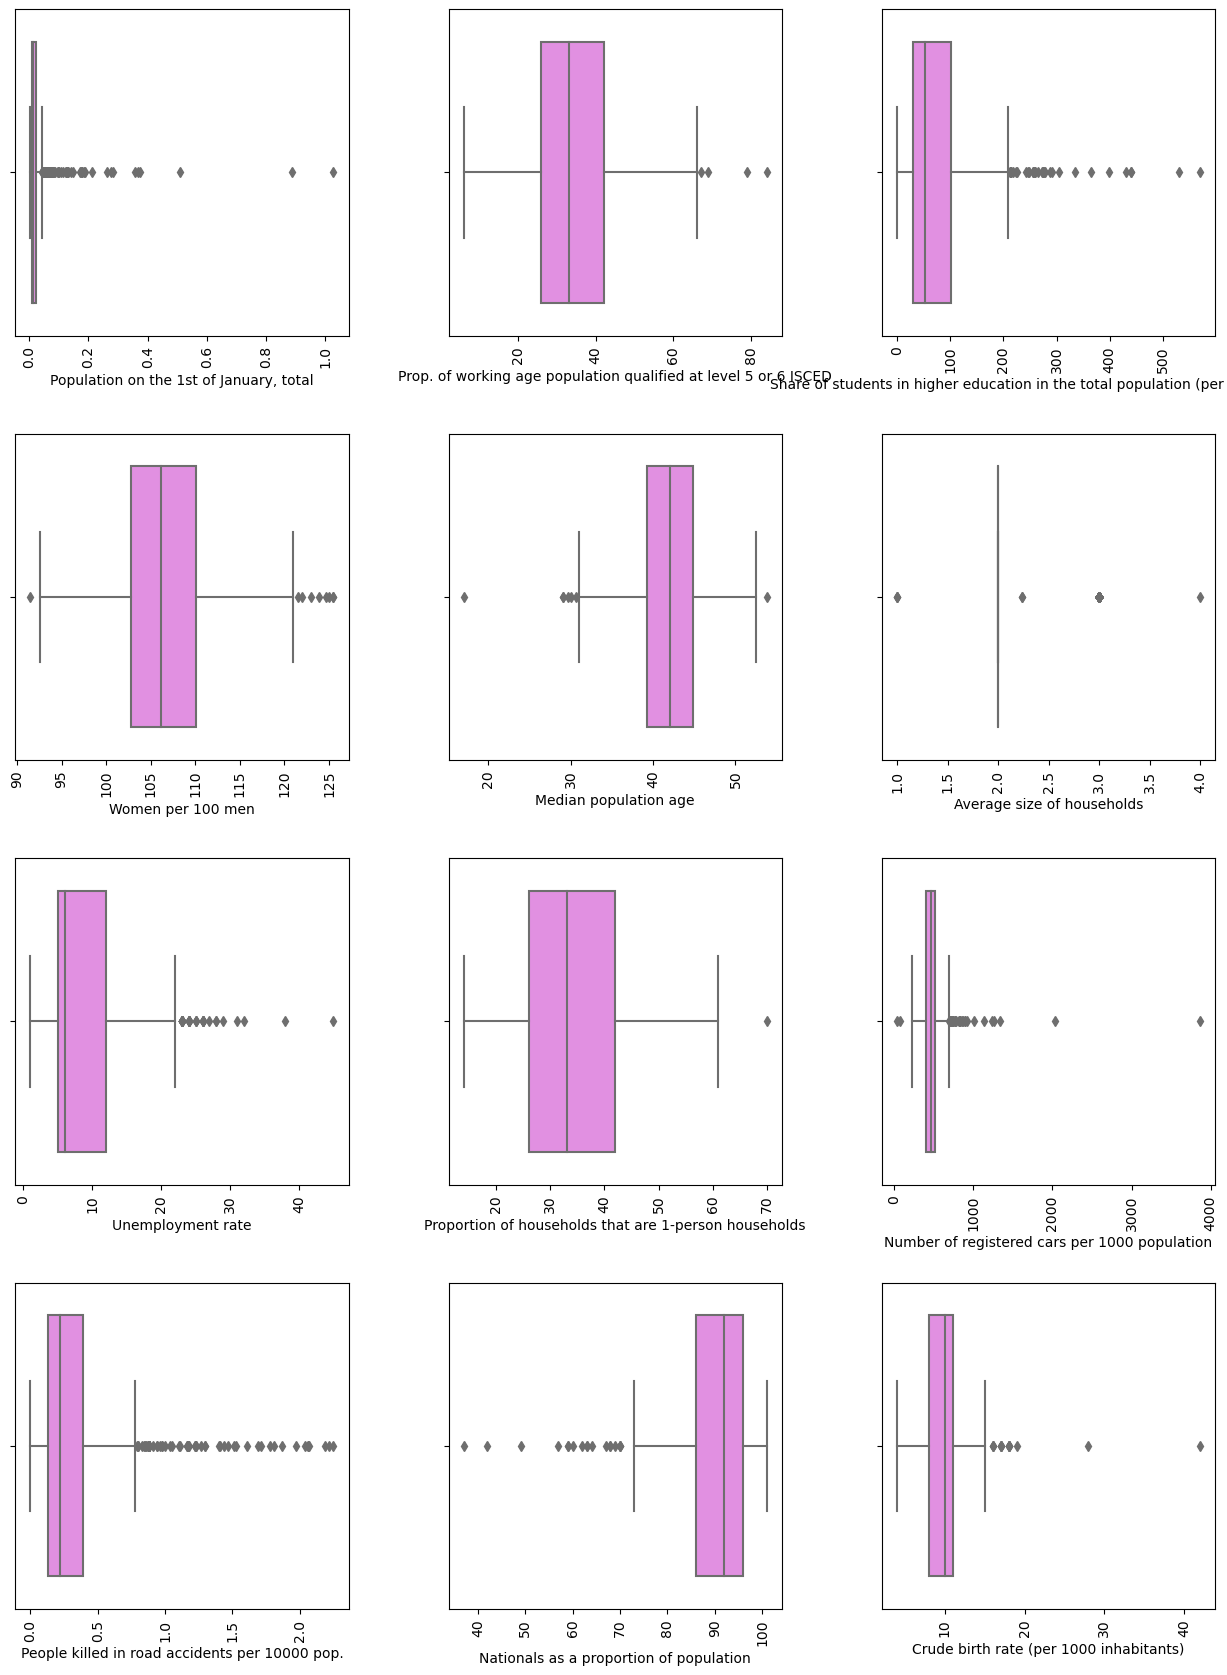

In [16]:
# determine the number of rows and columns in the plot grid
num_cols = 3  # number of columns in the grid
num_rows = (len(numeric_df.columns) + num_cols - 1) // num_cols  # number of rows in the grid

# create the plot grid and plot each distribution in a separate subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
plt.xticks(rotation=90)
for i, column in enumerate(numeric_df.columns):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx]
    sns.boxplot(x=numeric_df[column], ax=axes[row_idx, col_idx], color='violet')
    axes[row_idx, col_idx].set_xlabel(column)
    axes[row_idx, col_idx].set_xticklabels(axes[row_idx, col_idx].get_xticklabels(), rotation=90)

# adjust the spacing between subplots and show the figure
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.3, hspace=0.3)
plt.show()

In [17]:
for column in numeric_df.columns:
    iqr = np.percentile(numeric_df[column],75) - np.percentile(numeric_df[column],25) # data['IC1'].quantile(0.75)
    iqr
    # define the limits
    upper_limit = np.percentile(numeric_df[column],75) + 1.5*iqr
    lower_limit = np.percentile(numeric_df[column],25) - 1.5*iqr
    print("\nFeature name: ", column," | Upper limit: ", upper_limit," | Lower limit: ", lower_limit)
    size_exclusion=len(numeric_df.loc[(numeric_df[column]>upper_limit) | (numeric_df[column]<lower_limit)])
    print("Number of exclusions would be ",size_exclusion)
    #print(X_num.where((X_num[X_num[column]]<lower_limit) and (X_num[X_num[column]]>lower_limit)).shape())


Feature name:  Population on the 1st of January, total  | Upper limit:  429228.5  | Lower limit:  -128943.5
Number of exclusions would be  80

Feature name:  Prop. of working age population qualified at level 5 or 6 ISCED  | Upper limit:  66.0  | Lower limit:  2.0
Number of exclusions would be  4

Feature name:  Share of students in higher education in the total population (per 1000 persons)  | Upper limit:  210.0  | Lower limit:  -78.0
Number of exclusions would be  32

Feature name:  Women per 100 men  | Upper limit:  121.04999999999998  | Lower limit:  91.85
Number of exclusions would be  9

Feature name:  Median population age  | Upper limit:  53.19999999999999  | Lower limit:  30.80000000000001
Number of exclusions would be  7

Feature name:  Average size of households  | Upper limit:  2.0  | Lower limit:  2.0
Number of exclusions would be  211

Feature name:  Unemployment rate  | Upper limit:  22.5  | Lower limit:  -5.5
Number of exclusions would be  38

Feature name:  Proportio

In [21]:
data_df[data_df['Proportion of households that are 1-person households']>66]

,Unnamed: 0,"Population on the 1st of January, total",Prop. of working age population qualified at level 5 or 6 ISCED,Share of students in higher education in the total population (per 1000 persons),Women per 100 men,Median population age,Average size of households,Unemployment rate,Proportion of households that are 1-person households,Number of registered cars per 1000 population,People killed in road accidents per 10000 pop.,Nationals as a proportion of population,Crude birth rate (per 1000 inhabitants),cities_name
108,DE041C,99662.0,33.0,165.0,98.2,42.0,2.0,7.0,70.0,437.2,0.2,83.0,10.0,Kaiserslautern


In [22]:
data_df[data_df['Prop. of working age population qualified at level 5 or 6 ISCED']>66]

,Unnamed: 0,"Population on the 1st of January, total",Prop. of working age population qualified at level 5 or 6 ISCED,Share of students in higher education in the total population (per 1000 persons),Women per 100 men,Median population age,Average size of households,Unemployment rate,Proportion of households that are 1-person households,Number of registered cars per 1000 population,People killed in road accidents per 10000 pop.,Nationals as a proportion of population,Crude birth rate (per 1000 inhabitants),cities_name
542,NL018C,233273.0,69.0,158.0,100.8,31.0,2.0,6.0,59.0,330.33,0.13,91.0,10.0,Groningen
557,NL033C,177359.0,67.0,112.0,106.1,36.0,2.0,6.0,53.0,375.89,0.06,94.0,10.0,Nijmegen
733,UK016C,125339.0,79.0,164.0,93.0,30.6,3.0,5.0,30.0,313.88,0.00,69.0,11.0,Cambridge
828,UK111C,154455.0,84.0,272.0,96.0,29.0,3.0,4.0,21.0,300.12,0.13,75.0,11.0,Oxford


In [23]:
data_df[data_df['Crude birth rate (per 1000 inhabitants)']>15.5]

,Unnamed: 0,"Population on the 1st of January, total",Prop. of working age population qualified at level 5 or 6 ISCED,Share of students in higher education in the total population (per 1000 persons),Women per 100 men,Median population age,Average size of households,Unemployment rate,Proportion of households that are 1-person households,Number of registered cars per 1000 population,People killed in road accidents per 10000 pop.,Nationals as a proportion of population,Crude birth rate (per 1000 inhabitants),cities_name
368,FR051C,88052.0,28.0,14.0,103.5,34.0,3.0,19.0,33.0,399.56,0.11,80.0,18.0,Mantes-la-Jolie
370,FR053C,97821.0,33.0,37.0,107.3,34.0,2.0,15.0,36.0,427.57,0.10,82.0,18.0,Melun
376,FR059C,77028.0,22.0,16.0,104.1,33.0,3.0,23.0,32.0,376.29,0.39,78.0,18.0,Creil
379,FR062C,71437.0,16.0,5.0,111.5,17.0,4.0,45.0,14.0,72.06,0.28,42.0,42.0,Mamoudzou
384,FR067C,65948.0,31.0,16.0,109.0,34.0,2.0,14.0,35.0,401.42,0.30,86.0,17.0,Meaux
389,FR072C,65493.0,22.0,67.0,117.1,29.0,3.0,31.0,32.0,271.28,1.22,60.0,28.0,Cayenne
391,FR074C,53120.0,16.0,5.0,108.2,34.0,3.0,38.0,23.0,338.63,0.00,99.0,18.0,Saint-Louis
393,FR076C,61841.0,33.0,7.0,103.5,35.0,2.0,18.0,46.0,506.46,0.00,79.0,17.0,Annemasse-Geneva (French part)
421,IE001C,1325700.0,29.0,36.0,101.4,33.0,3.0,17.0,24.0,413.01,0.41,86.0,16.0,Dublin
423,IE003C,56980.0,17.0,63.0,106.6,34.0,3.0,7.0,25.0,307.21,0.21,94.0,17.0,Limerick
